In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
red=pd.read_csv('winequality-red.csv',sep=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
x=red.drop(columns=['quality'])
y=red['quality']
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


## KDE

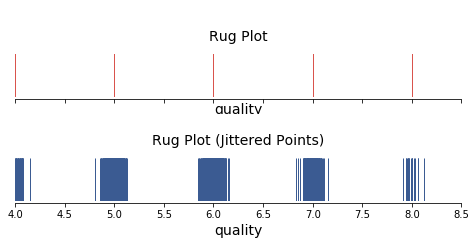

In [9]:
# We make our own rug plots, wrapping seaborn calls.
# One plot needs jittered points.
jitter = 0.05

# Collect our two data sets
data = []
data.append(red['quality'])
#print(data)
data.append(red['quality'] + np.random.normal(0, jitter, len(red['quality'])))

# Make the plots
fig, axs = plt.subplots(figsize=(8, 3.5), nrows=2, ncols=1, sharex=True)

# Set plot colors and titles
clr = [sns.xkcd_rgb["pale red"], sns.xkcd_rgb["denim blue"]]
ttl = ['Rug Plot', 'Rug Plot (Jittered Points)']

# MMake each subplot
for idx, dat in enumerate(data):
    sns.rugplot(ax = axs[idx], a=dat, height=0.5, c = clr[idx])
    axs[idx].set_yticks([])
    axs[idx].set_xlim(4.0, 8.5)
    axs[idx].set_xlabel('quality', fontsize=14)
    axs[idx].text(6.25, 0.65, ttl[idx], ha='center', fontsize=14)
    sns.despine(ax=axs[idx], left=True, offset=2, trim=True)

plt.show()

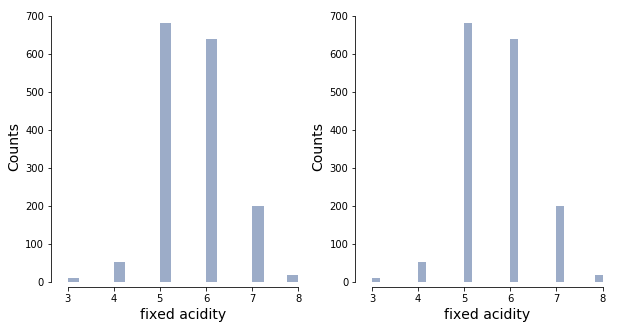

In [11]:
# Make comparative histograms, two different binning strategies
nbs = [20, 30]

# Make plots
fig, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

for ax, nb in zip(axs, nbs):
    ax.hist(red['quality'], bins=nb, alpha=0.5, color=sns.xkcd_rgb["denim blue"])
    ax.set_xlabel('fixed acidity', fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    sns.despine(ax=ax, offset=5, trim=True)

plt.show()

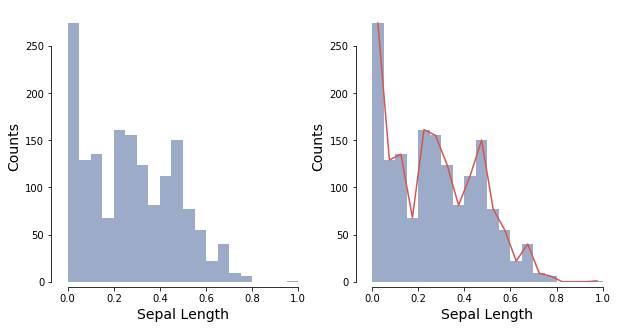

In [12]:
nb = 20

# Make plot
fig, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=2)

for idx, ax in enumerate(axs):
    
    # Make histogram, but grab output values to later connect bins
    n, bins, patches = ax.hist(red['citric acid'], bins=nb, \
                               alpha=0.5, color=sns.xkcd_rgb["denim blue"])
    ax.set_xlabel('Sepal Length', fontsize=14)
    ax.set_ylabel('Counts', fontsize=14)
    
    # Connect bin centers for second plot
    if idx:
        bc = bins[:-1] + (bins[1] - bins[0])/2.0
        ax.plot(bc, n, c=sns.xkcd_rgb["pale red"])

    sns.despine(ax=ax, offset=5, trim=True)

plt.show()

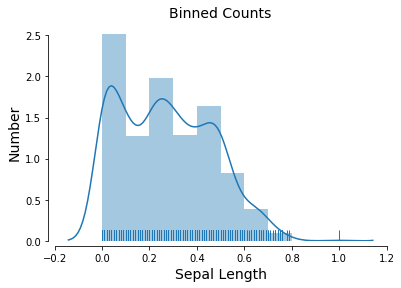

In [13]:
# Use Seaborn to make a KDE over histogram.
# Add in a rug plot for good measure.
ax = sns.distplot(red['citric acid'], kde=True, rug=True, bins=10)
#ax.set_xlim(3.5, 8.5)
#ax.set_ylim(0, 0.6)
ax.set_xlabel('Sepal Length', fontsize=14)
ax.set_ylabel('Number', fontsize=14)
ax.set_title('Binned Counts', fontsize=14)
sns.despine(offset=5, trim=True)

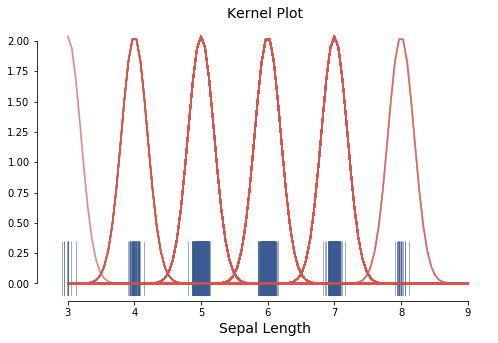

In [14]:
 #KDE demonstration
# Modified from Seaborn documentation

from scipy import stats, integrate

# For kernel Density Estimation, 
# we need a Kernel model and a bandwidth.
# Here we assume a Gaussian Kernel, and the Seaborn bandwidth.

dt = red['quality']
bw = 1.06 * dt.std() * len(dt) ** (-1 / 5.)
support = np.linspace(3, 9, 100)

# Make the plot
fig, ax = plt.subplots(figsize=(8, 5))

# We construct and plot a Gaussian over each 'rug fiber'
kernels = []
for d in dt:
    kernel = stats.norm(d, bw).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color=sns.xkcd_rgb["pale red"], alpha = 0.1)

# Now show rugplot as support.
sns.rugplot(data[1], color=sns.xkcd_rgb["denim blue"], \
            height=0.2, linewidth=1, alpha = 0.5)
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Plot', fontsize=14)

sns.despine(offset=5, trim=True)
plt.show()

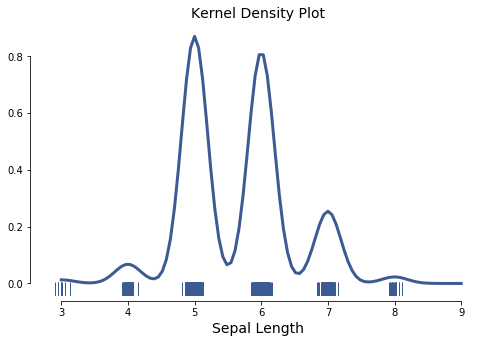

In [15]:
# Now combine the Guassian kernels into a a KDE

# To compute kernel density estimate, we sum up the individual kernels and 
# normalize by total area.
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)

# Make the plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the KDE
plt.plot(support, density, color=sns.xkcd_rgb["denim blue"], linewidth=3)
#plt.ylim(0.0, 0.5)

# Now show rugplot as support.
sns.rugplot(data[1], color=sns.xkcd_rgb["denim blue"], linewidth=1)
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)

sns.despine(offset=5, trim=True)
plt.show()

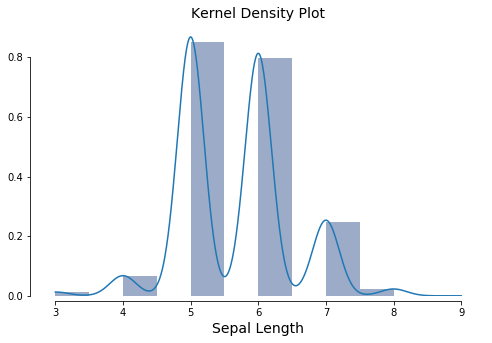

In [16]:
# Now repeat the process by using scikit learn
from sklearn.neighbors import KernelDensity

# Gaussian KDE with Seaborn bandwidth
kde = KernelDensity(kernel='gaussian', bandwidth=bw)

# Grab the data, and compute the support (sampling points)
x = red['quality']
support = np.linspace(3, 9, len(x))

# Create the KDE, and return the support values.
kde.fit(x[:, np.newaxis])
y = kde.score_samples(support[:, np.newaxis])

# Plot the results including underlying histogram
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True)
ax.plot(support, np.exp(y))
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)

sns.despine(offset=5, trim=True)
plt.show()


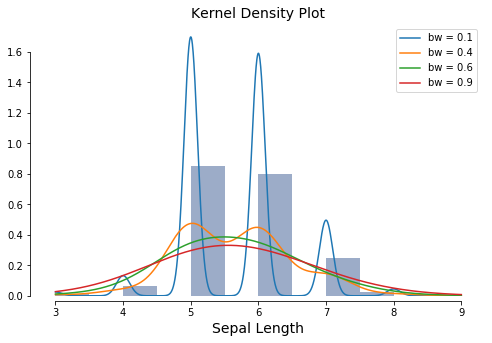

In [17]:
# Compare the impact of bandwidth selection on a KDE
from sklearn.neighbors import KernelDensity

# Make plots
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(x, bins=10, alpha=0.5, color=sns.xkcd_rgb["denim blue"], normed=True, label='')

# Gaussian KDE with varying bandwidths
for bw in np.linspace(0.1, 0.9, 4):
    kde = KernelDensity(kernel='gaussian', bandwidth=bw)
    kde.fit(x[:, np.newaxis])
    y = kde.score_samples(support[:, np.newaxis])
    ax.plot(support, np.exp(y), label='bw = {0:3.1f}'.format(bw))

# Decorate plot
plt.xlabel('Sepal Length', fontsize=14)
plt.title('Kernel Density Plot', fontsize=14)
plt.legend()

sns.despine(offset=5, trim=True)
plt.show()

In [18]:
ncps = 20
bw = 0.6 # Could do grid search to determine
nimgs = 5000 # Multiple of ten

kde = KernelDensity(bandwidth=0.6)
kde.fit(red)

# Sample from model, and recover full image
new_data = kde.sample(nimgs, random_state=42)
print(new_data.shape)
# Plot input data
#hd.plot_numbers(x[:10])

#for idx in range(0, nimgs, 10):
#    hd.plot_numbers(new_data[0 + idx:10 + idx])

(5000, 12)


In [19]:
new_data  = pd.DataFrame(new_data)

In [20]:
new_data.columns = list(red.columns) 

In [21]:

new_data1 = red.append(new_data)

In [22]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6599 entries, 0 to 4999
Data columns (total 12 columns):
fixed acidity           6599 non-null float64
volatile acidity        6599 non-null float64
citric acid             6599 non-null float64
residual sugar          6599 non-null float64
chlorides               6599 non-null float64
free sulfur dioxide     6599 non-null float64
total sulfur dioxide    6599 non-null float64
density                 6599 non-null float64
pH                      6599 non-null float64
sulphates               6599 non-null float64
alcohol                 6599 non-null float64
quality                 6599 non-null float64
dtypes: float64(12)
memory usage: 670.2 KB


In [23]:
X=new_data1.drop(columns=['quality'])
y=new_data1['quality']
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6599 entries, 0 to 4999
Data columns (total 11 columns):
fixed acidity           6599 non-null float64
volatile acidity        6599 non-null float64
citric acid             6599 non-null float64
residual sugar          6599 non-null float64
chlorides               6599 non-null float64
free sulfur dioxide     6599 non-null float64
total sulfur dioxide    6599 non-null float64
density                 6599 non-null float64
pH                      6599 non-null float64
sulphates               6599 non-null float64
alcohol                 6599 non-null float64
dtypes: float64(11)
memory usage: 618.7 KB


In [24]:
from sklearn.model_selection import train_test_split
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [91]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticClassifier
from sklearn import metrics


# using the AgeBins and FareBins data here
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=seed)


C = 1.0  # SVM regularization parameter
svc = svm.SVR(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVR(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVR(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
#poly_svc = svm.SVR(kernel='poly', C=C)
# decision tree
dt = DecisionTreeRegressor(random_state=0)
# random forest 
rf = RandomForestRegressor(random_state=0)
# naive bayes
#nb = GaussianNB()
# perceptron 
#per = Perceptron()
#log_model = LogisticRegression()
# knn 
knn=KNeighborsRegressor(n_neighbors=15) # log(1599) is about 7
# bagging classifier
bc = BaggingRegressor(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostRegressor(base_estimator=dt, random_state=0)


##log_model, poly_svc, per,'Logistic Regression', 'SVC(polynomial)','Perceptron', 'Naive Bayes',
models = [ svc, lin_svc, rbf_svc,dt, rf, knn, bc, ada]
names = ['SVC(linear kernal)', 'Linear SVC','SVC(RBF)','Decision Tree',
        'Random Forest',  'KNN' , 'Bagging Classifier', 'Ada Boosting']
               #'VotingClassifier'
reports2=[]
f1_score2=[]
precision2=[]
recall2=[]
accuracy=[]


for model in models: 
    # fit the model
    model.fit(X_train,y_train)
    # predict on the test set 
    y_pred=model.predict(X_test)
    y_pred =  np.round(y_pred)
    y_test =  np.round(y_test)
    
    
    # save the scores for comparison 
    report=metrics.classification_report(y_test, y_pred)
    #reports2.append(report)
    #f1_score2.append(report['weighted avg']['f1-score'])
    #precision2.append(report['weighted avg']['precision'])
    #recall2.append(report['weighted avg']['recall'])
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

In [92]:
print(accuracy)

[0.4553030303030303, 0.43636363636363634, 0.5174242424242425, 0.37727272727272726, 0.49393939393939396, 0.478030303030303, 0.4984848484848485, 0.4803030303030303]


In [ ]:
###poly_svc.fit(X_train,y_train) takes long time to run and interrupted
##per,log_model these two models have errors
## nb removed

In [53]:
models_df=pd.DataFrame({'models':names2, 'accuracy':accuracy,'f1_score':f1_score2,'precision':precision2, 'recall':recall2})
models_df.round(3).sort_values(by='accuracy', ascending=False)

[0.7892215297464921, 1.1978814989311597, 0.6392408202723219, 1.376467908590866, 0.7472994527721376, 0.6869277615905885, 0.7477465162072755, 0.7309216457840173]


In [82]:
print(y_pred)

[5. 5. 6. ... 5. 5. 6.]


In [87]:
report = metrics.classification_report(y_test, y_pred)
    